In [195]:
import inspect #, sys, importlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model
from sklearn.model_selection import train_test_split

SEED = 222

In [196]:
email_type = {
    "professional" : [
        '@mmm.com',
        '@amex.com',
        '@apple.com',
        '@boeing.com',
        '@caterpillar.com',
        '@chevron.com',
        '@cisco.com',
        '@cocacola.com',
        '@disney.com',
        '@dupont.com',
        '@exxon.com',
        '@ge.org',
        '@goldmansacs.com',
        '@homedepot.com',
        '@ibm.com',
        '@intel.com',
        '@jnj.com',
        '@jpmorgan.com',
        '@mcdonalds.com',
        '@merck.com',
        '@microsoft.com',
        '@nike.com',
        '@pfizer.com',
        '@pg.com',
        '@travelers.com',
        '@unitedtech.com',
        '@unitedhealth.com',
        '@verizon.com',
        '@visa.com',
        '@walmart.com'
    ],
    "personal" : [
        '@gmail.com',
        '@yahoo.com',
        '@protonmail.com'
    ],
    "junk" : [
        '@me.com',
        '@aol.com',
        '@hotmail.com',
        '@live.com',
        '@msn.com',
        '@passport.com'
    ]
}

In [198]:
def set_EmailType(data):
    result = "Unknown"
    data = "@" + data
    for key in email_type.keys():
        if data in email_type[key]:
            result = key
            break
    return result

df = pd.read_excel("Apprentice_Chef_Dataset.xlsx")
df.isna().sum()

df["EMAIL_DOMAIN"] = pd.DataFrame(df["EMAIL"].apply(str.split, sep = "@").to_list()).iloc[:,1]
df["EMAIL_TYPE"]   = df["EMAIL_DOMAIN"].apply(set_EmailType)
df = pd.concat([df, pd.get_dummies(df["EMAIL_TYPE"])], axis = 1)
df.drop(["EMAIL_DOMAIN","EMAIL_TYPE"], axis=1)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,junk,personal,professional
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,...,90,165.8,6,1,3,11,0,1,0,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,...,90,150.5,4,1,3,13,90,0,0,1
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,...,80,99.6,3,0,3,12,0,0,1,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,...,90,125.0,3,0,3,13,0,0,0,1
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,...,90,135.3,3,1,3,13,253,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1515.0,0,Yandry,yandry@yahoo.com,Yandry,Yandry,38,9,6,9,...,20,117.7,4,0,3,12,98,0,1,0
1942,1432.0,0,Yorkel,yorkel@gmail.com,Yorkel,Yorkel,47,8,4,8,...,20,98.1,3,0,3,13,0,0,1,0
1943,623.0,0,Young Henly,young.henly@gmail.com,Young,Henly,14,6,11,1,...,30,86.4,3,1,2,18,0,0,1,0
1944,899.0,0,Ysilla,ysilla@protonmail.com,Ysilla,Ysilla,15,4,12,6,...,20,86.9,1,0,2,17,0,0,1,0


<h3>Outliers</h3>

In [199]:
#Outliers

#CROSS_SELL_SUCCESS
#NO OUTLIER


#TOTAL_MEALS_ORDERED
out_total_meals_ordered = 180

df['out_TOTAL_MEALS_ORDERED'] = 0
condition = df.loc[0:,'out_TOTAL_MEALS_ORDERED'][df['TOTAL_MEALS_ORDERED'] > out_total_meals_ordered]
df['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition,
                               value      = 1,
                               inplace    = True)


#UNIQUE_MEALS_PURCH
out_unique_meals_purch = 13

df['out_UNIQUE_MEALS_PURCH'] = 0
condition = df.loc[0:,'out_UNIQUE_MEALS_PURCH'][df['UNIQUE_MEALS_PURCH'] > out_unique_meals_purch]
df['out_UNIQUE_MEALS_PURCH'].replace(to_replace = condition,
                               value      = 1,
                               inplace    = True)


#CONTACTS_W_CUSTOMER_SERVICE
out_contacts_w_customer_service = 12.5

df['out_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition = df.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][df['CONTACTS_W_CUSTOMER_SERVICE'] > out_contacts_w_customer_service]
df['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition,
                               value      = 1,
                               inplace    = True)


#PRODUCT_CATEGORIES_VIEWED
#NO OUTLIER


#AVG_TIME_PER_SITE_VISIT
out_avg_time_per_site_visit = 190

df["out_AVG_TIME_PER_SITE_VISIT"] = 0
condition = df.loc[0:,'out_AVG_TIME_PER_SITE_VISIT'][df['AVG_TIME_PER_SITE_VISIT'] > out_avg_time_per_site_visit]
df['out_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition,
                               value      = 1,
                               inplace    = True)


#MOBILE_NUMBER
#NO OUTLIER


#CANCELLATIONS_BEFORE_NOON
out_cancellation_before_noon = 5

df["out_CANCELLATIONS_BEFORE_NOON"] = 0
condition = df.loc[0:,'out_CANCELLATIONS_BEFORE_NOON'][df['CANCELLATIONS_BEFORE_NOON'] > out_cancellation_before_noon]
df['out_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition,
                               value      = 1,
                               inplace    = True)


#CANCELLATIONS_AFTER_NOON
out_cancellation_after_noon = 0

df["out_CANCELLATIONS_AFTER_NOON"] = 0
condition = df.loc[0:,'out_CANCELLATIONS_AFTER_NOON'][df['CANCELLATIONS_AFTER_NOON'] > out_cancellation_after_noon]
df['out_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition,
                                           value      = 1,
                                           inplace    = True)


#TASTES_AND_PREFERENCES
#NO OUTLIER


#MOBILE_LOGINS
#NO OUTLIER


#PC_LOGINS
#NO OUTLIER


#WEEKLY_PLAN
out_weekly_plan = 31

df["out_WEEKLY_PLAN"] = 0
condition = df.loc[0:,'out_WEEKLY_PLAN'][df['WEEKLY_PLAN'] > out_weekly_plan]
df['out_WEEKLY_PLAN'].replace(to_replace = condition,
                              value      = 1,
                              inplace    = True)


#EARLY_DELIVERIES
out_early_deliveries = 7

df["out_EARLY_DELIVERIES"] = 0
condition = df.loc[0:,'out_EARLY_DELIVERIES'][df['EARLY_DELIVERIES'] > out_early_deliveries]
df['out_EARLY_DELIVERIES'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)


#LATE_DELIVERIES
out_late_deliveries = 8

df["out_LATE_DELIVERIES"] = 0
condition = df.loc[0:,'out_LATE_DELIVERIES'][df['LATE_DELIVERIES'] > out_late_deliveries]
df['out_LATE_DELIVERIES'].replace(to_replace = condition,
                                  value      = 1,
                                  inplace    = True)


#PACKAGE_LOCKER
#NO OUTLIER


#REFRIGERATED_LOCKER
#NO OUTLIER


#FOLLOWED_RECOMMENDATIONS_PCT
#NO OUTLIER


#AVG_PREP_VID_TIME
out_avg_prep_vid_time = 260

df["out_AVG_PREP_VID_TIME"] = 0
condition = df.loc[0:,'out_AVG_PREP_VID_TIME'][df['AVG_PREP_VID_TIME'] > out_avg_prep_vid_time]
df['out_AVG_PREP_VID_TIME'].replace(to_replace = condition,
                                    value      = 1,
                                    inplace    = True)


#LARGEST_ORDER_SIZE
out_largest_order_size = 8

df["out_LARGEST_ORDER_SIZE"] = 0
condition = df.loc[0:,'out_LARGEST_ORDER_SIZE'][df['LARGEST_ORDER_SIZE'] > out_largest_order_size]
df['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition,
                               value      = 1,
                               inplace    = True)


#MASTER_CLASSES_ATTENDED
out_master_classes_attended = 1

df["out_MASTER_CLASSES_ATTENDED"] = 0
condition = df.loc[0:,'out_MASTER_CLASSES_ATTENDED'][df['MASTER_CLASSES_ATTENDED'] > out_master_classes_attended]
df['out_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition,
                                          value      = 1,
                                          inplace    = True)


#MEDIAN_MEAL_RATING
out_median_meal_rating = 4

df["out_MEDIAN_MEAL_RATING"] = 0
condition = df.loc[0:,'out_MEDIAN_MEAL_RATING'][df['MEDIAN_MEAL_RATING'] > out_master_classes_attended]
df['out_MEDIAN_MEAL_RATING'].replace(to_replace = condition,
                                     value      = 1,
                                     inplace    = True)

#AVG_CLICKS_PER_VISIT
out_avg_clicks_per_visit = 8

df["out_AVG_CLICKS_PER_VISIT"] = 0
condition = df.loc[0:,'out_AVG_CLICKS_PER_VISIT'][df['AVG_CLICKS_PER_VISIT'] < out_avg_clicks_per_visit]
df['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition, 
                                          value      = 1, 
                                          inplace    = True)


#TOTAL_PHOTOS_VIEWED
out_total_photos_viewed = 420

df["out_TOTAL_PHOTOS_VIEWED"] = 0
condition = df.loc[0:,'out_TOTAL_PHOTOS_VIEWED'][df['TOTAL_PHOTOS_VIEWED'] > out_total_photos_viewed]
df['out_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition, 
                                          value      = 1, 
                                          inplace    = True)

#SAVING TO EXCEL
df.to_excel("apprentice_chef_new_features.xlsx")

<h3>Trend Change</h3>

In [219]:
#Trend Change

#CROSS_SELL_SUCCESS
#NO TREND

#TOTAL_MEALS_ORDERED
tot_meals_seg_change = 20

df['TOTAL_MEALS_ORDERED_change_1'] = 0
condition = df.loc[0:,'TOTAL_MEALS_ORDERED_change_1'][df['TOTAL_MEALS_ORDERED'] < tot_meals_seg_change]
df['TOTAL_MEALS_ORDERED_change_1'].replace(to_replace = condition,
                               value      = 1,
                               inplace    = True)
tot_meals_seg_change = 300

df['TOTAL_MEALS_ORDERED_change_2'] = 0
condition = df.loc[0:,'TOTAL_MEALS_ORDERED_change_2'][df['TOTAL_MEALS_ORDERED'] > tot_meals_seg_change]
df['TOTAL_MEALS_ORDERED_change_2'].replace(to_replace = condition,
                               value      = 1,
                               inplace    = True)

#tot_meals_seg_change = 200
#
#df['TOTAL_MEALS_ORDERED_change_2'] = 0
#condition = df.loc[0:,'TOTAL_MEALS_ORDERED_change_2'][df['TOTAL_MEALS_ORDERED'] > tot_meals_seg_change]
#df['TOTAL_MEALS_ORDERED_change_2'].replace(to_replace = condition,
#                               value      = 1,
#                               inplace    = True)


#UNIQUE_MEALS_PURCH
unique_meals_purch_change = 9

df['UNIQUE_MEALS_PURCH_change'] = 0
condition = df.loc[0:,'UNIQUE_MEALS_PURCH_change'][df['UNIQUE_MEALS_PURCH'] > unique_meals_purch_change]
df['UNIQUE_MEALS_PURCH_change'].replace(to_replace = condition,
                               value      = 1,
                               inplace    = True)


#CONTACTS_W_CUSTOMER_SERVICE
contacts_w_customer_service_change_1 = 10

df['CONTACTS_W_CUSTOMER_SERVICE_change_1'] = 0
condition = df.loc[0:,'CONTACTS_W_CUSTOMER_SERVICE_change_1'][df['CONTACTS_W_CUSTOMER_SERVICE'] <= contacts_w_customer_service_change_1]
df['CONTACTS_W_CUSTOMER_SERVICE_change_1'].replace(to_replace = condition,
                               value      = 1,
                               inplace    = True)


contacts_w_customer_service_change_2 = 12
df['CONTACTS_W_CUSTOMER_SERVICE_change_2'] = 0
condition = df.loc[0:,'CONTACTS_W_CUSTOMER_SERVICE_change_2'][df['CONTACTS_W_CUSTOMER_SERVICE'] > contacts_w_customer_service_change_2]
df['CONTACTS_W_CUSTOMER_SERVICE_change_2'].replace(to_replace = condition,
                               value      = 1,
                               inplace    = True)


#PRODUCT_CATEGORIES_VIEWED
#NO TREND


#AVG_TIME_PER_SITE_VISIT
avg_time_per_site_visit = 300

df["AVG_TIME_PER_SITE_VISIT_change"] = 0
condition = df.loc[0:,'AVG_TIME_PER_SITE_VISIT_change'][df['AVG_TIME_PER_SITE_VISIT'] > avg_time_per_site_visit]
df['AVG_TIME_PER_SITE_VISIT_change'].replace(to_replace = condition,
                               value      = 1,
                               inplace    = True)

#MOBILE_NUMBER
#NO TREND


#CANCELLATIONS_BEFORE_NOON
cancellation_before_noon_change = 5

df["CANCELLATIONS_BEFORE_NOON_change"] = 0
condition = df.loc[0:,'CANCELLATIONS_BEFORE_NOON_change'][df['CANCELLATIONS_BEFORE_NOON'] > cancellation_before_noon_change]
df['CANCELLATIONS_BEFORE_NOON_change'].replace(to_replace = condition,
                               value      = 1,
                               inplace    = True)


#CANCELLATIONS_AFTER_NOON
cancellation_after_noon_change = 2

df["CANCELLATIONS_AFTER_NOON_change"] = 0
condition = df.loc[0:,'CANCELLATIONS_AFTER_NOON_change'][df['CANCELLATIONS_AFTER_NOON'] > cancellation_after_noon_change]
df['CANCELLATIONS_AFTER_NOON_change'].replace(to_replace = condition,
                               value      = 1,
                               inplace    = True)


#TASTES_AND_PREFERENCES
#NO TREND


#MOBILE_LOGINS
mobile_logins_change = 5.5

df["MOBILE_LOGINS_change"] = 0
condition = df.loc[0:,'MOBILE_LOGINS_change'][df['MOBILE_LOGINS'] > mobile_logins_change]
df['MOBILE_LOGINS_change'].replace(to_replace = condition,
                               value      = 1,
                               inplace    = True)


#PC_LOGINS
pc_logins_change = 1.5

df["PC_LOGINS_change"] = 0
condition = df.loc[0:,'PC_LOGINS_change'][df['PC_LOGINS'] > pc_logins_change]
df['PC_LOGINS_change'].replace(to_replace = condition,
                               value      = 1,
                               inplace    = True)

#WEEKLY_PLAN
weekly_plan_change = 0

df["WEEKLY_PLAN_change"] = 0
condition = df.loc[0:,'WEEKLY_PLAN_change'][df['WEEKLY_PLAN'] == weekly_plan_change]
df['WEEKLY_PLAN_change'].replace(to_replace = condition,
                               value      = 1,
                               inplace    = True)


#EARLY_DELIVERIES
early_deliveries_change = 4

df["EARLY_DELIVERIES_change"] = 0
condition = df.loc[0:,'EARLY_DELIVERIES_change'][df['EARLY_DELIVERIES'] > early_deliveries_change]
df['EARLY_DELIVERIES_change'].replace(to_replace = condition,
                               value      = 1,
                               inplace    = True)


#LATE_DELIVERIES
late_deliveries_change = 15

df["LATE_DELIVERIES_change"] = 0
condition = df.loc[0:,'EARLY_DELIVERIES_change'][df['LATE_DELIVERIES'] > late_deliveries_change]
df['LATE_DELIVERIES_change'].replace(to_replace = condition,
                               value      = 1,
                               inplace    = True)


#PACKAGE_LOCKER
#NO TREND


#REFRIGERATED_LOCKER
#NO TREND


#FOLLOWED_RECOMMENDATIONS_PCT
#NO TREND


#AVG_PREP_VID_TIME
avg_prep_vid_time_change = 300

df["AVG_PREP_VID_TIME_change"] = 0
condition = df.loc[0:,'AVG_PREP_VID_TIME_change'][df['AVG_PREP_VID_TIME'] > avg_prep_vid_time_change]
df['AVG_PREP_VID_TIME_change'].replace(to_replace = condition,
                               value      = 1,
                               inplace    = True)


#LARGEST_ORDER_SIZE
largest_order_size_change = 8

df["LARGEST_ORDER_SIZE_change"] = 0
condition = df.loc[0:,'LARGEST_ORDER_SIZE_change'][df['LARGEST_ORDER_SIZE'] > largest_order_size_change]
df['LARGEST_ORDER_SIZE_change'].replace(to_replace = condition,
                               value      = 1,
                               inplace    = True)


##MASTER_CLASSES_ATTENDED
master_classes_attended_change = 2

df["MASTER_CLASSES_ATTENDED_change"] = 0
condition = df.loc[0:,'MASTER_CLASSES_ATTENDED_change'][df['MASTER_CLASSES_ATTENDED'] > master_classes_attended_change]
df['MASTER_CLASSES_ATTENDED_change'].replace(to_replace = condition,
                               value      = 1,
                               inplace    = True)


#MEDIAN_MEAL_RATING
median_meal_rating_change = 4

df["MEDIAN_MEAL_RATING_change"] = 0
condition = df.loc[0:,'MEDIAN_MEAL_RATING_change'][df['MEDIAN_MEAL_RATING'] > median_meal_rating_change]
df['MEDIAN_MEAL_RATING_change'].replace(to_replace = condition,
                               value      = 1,
                               inplace    = True)


#AVG_CLICKS_PER_VISIT
avg_clicks_per_visit_change = 10

df["AVG_CLICKS_PER_VISIT_change"] = 0
condition = df.loc[0:,'AVG_CLICKS_PER_VISIT_change'][df['AVG_CLICKS_PER_VISIT'] > median_meal_rating_change]
df['AVG_CLICKS_PER_VISIT_change'].replace(to_replace = condition,
                               value      = 1,
                               inplace    = True)


#TOTAL_PHOTOS_VIEWED
total_photos_viewed_change = 1000

df['TOTAL_PHOTOS_VIEWED_change_1'] = 0
condition = df.loc[0:,'TOTAL_PHOTOS_VIEWED_change_1'][df['TOTAL_PHOTOS_VIEWED'] > total_photos_viewed_change]
df['TOTAL_PHOTOS_VIEWED_change_1'].replace(to_replace = condition, 
                                         value      = 1, 
                                         inplace    = True)
total_photos_viewed_change = 0

df['TOTAL_PHOTOS_VIEWED_change_2'] = 0
condition = df.loc[0:,'TOTAL_PHOTOS_VIEWED_change_2'][df['TOTAL_PHOTOS_VIEWED'] == total_photos_viewed_change]
df['TOTAL_PHOTOS_VIEWED_change_2'].replace(to_replace = condition, 
                                         value      = 1, 
                                         inplace    = True)

#HAS EMAIL
has_email = 1

df['HAS_EMAIL'] = 1
condition = df.loc[0:,'HAS_EMAIL'][df['junk'] == has_email]
df['HAS_EMAIL'].replace(to_replace = condition, 
                                         value      = 0, 
                                         inplace    = True)


#SAVING TO EXCEL
df.to_excel("apprentice_chef_new_features.xlsx")

In [202]:
df_corr = df.corr()
df_corr[np.abs(df_corr) > 0.6].to_excel("correlation.xlsx")


df["FAMILY_NAME"] = df["FAMILY_NAME"].fillna("NO FAMILY")
family_revenue = pd.DataFrame(df[df["FAMILY_NAME"] != "NO FAMILY"].groupby("FAMILY_NAME").sum()["REVENUE"].sort_values(ascending=False)/df.sum()["REVENUE"]).cumsum()
df["IS_VIP"] = 0
condition = df.loc[:,"IS_VIP"][df.FAMILY_NAME.isin(family_revenue[family_revenue["REVENUE"] <= 0.8].index.to_list())]
df["IS_VIP"].replace(to_replace = condition,
                     value = 1,
                     inplace = True
)

df = df[df["REVENUE"] < 6000]
#df = df[df["AVG_TIME_PER_SITE_VISIT"] < 1000]

df["REVENUE_PER_MEAL"] = df["REVENUE"] / df["TOTAL_MEALS_ORDERED"]

def hasBeverage(x):
    if x > 23:
        return 1
    else:
        return 0

df["HAS_BEVERAGE"] = df["REVENUE_PER_MEAL"].apply(hasBeverage)


df["log_REVENUE"] = np.log(df["REVENUE"])

<h1>Regressions</h1>
<h2>OLS</h2>

In [256]:
import statsmodels.formula.api as smf

x_variable_rnd1 = [
    'CROSS_SELL_SUCCESS',
    'TOTAL_MEALS_ORDERED',
    'UNIQUE_MEALS_PURCH',
    'CONTACTS_W_CUSTOMER_SERVICE',
    'PRODUCT_CATEGORIES_VIEWED',
    'AVG_TIME_PER_SITE_VISIT',
    'MOBILE_NUMBER',
    'CANCELLATIONS_BEFORE_NOON',
    'CANCELLATIONS_AFTER_NOON',
    'TASTES_AND_PREFERENCES',
    'MOBILE_LOGINS',
    'PC_LOGINS',
    'WEEKLY_PLAN',
    'EARLY_DELIVERIES',
    'LATE_DELIVERIES',
    'PACKAGE_LOCKER',
    'REFRIGERATED_LOCKER',
    'FOLLOWED_RECOMMENDATIONS_PCT',
    'AVG_PREP_VID_TIME',
    'LARGEST_ORDER_SIZE',
    'MASTER_CLASSES_ATTENDED',
    'MEDIAN_MEAL_RATING',
    'AVG_CLICKS_PER_VISIT',
    'TOTAL_PHOTOS_VIEWED',

    #New Features
    'HAS_EMAIL',                   
    'IS_VIP',                      
    'HAS_BEVERAGE',                 

    #Outliers
    'out_TOTAL_MEALS_ORDERED',          
    'out_CONTACTS_W_CUSTOMER_SERVICE',  
    'out_AVG_TIME_PER_SITE_VISIT',      
    'out_AVG_PREP_VID_TIME',            
    'out_LARGEST_ORDER_SIZE',           
    'out_MASTER_CLASSES_ATTENDED',      
    'out_MEDIAN_MEAL_RATING',           
    'out_AVG_CLICKS_PER_VISIT',         
    'out_TOTAL_PHOTOS_VIEWED',          

    #Trends
    'TOTAL_MEALS_ORDERED_change_1',        
    'TOTAL_MEALS_ORDERED_change_2',        
    'CONTACTS_W_CUSTOMER_SERVICE_change_1',
    'CONTACTS_W_CUSTOMER_SERVICE_change_2',
    'AVG_TIME_PER_SITE_VISIT_change',      
    'AVG_PREP_VID_TIME_change',            
    'LARGEST_ORDER_SIZE_change',           
    'MASTER_CLASSES_ATTENDED_change',      
    'MEDIAN_MEAL_RATING_change',           
    'AVG_CLICKS_PER_VISIT_change',         
    'TOTAL_PHOTOS_VIEWED_change_1',        
    'TOTAL_PHOTOS_VIEWED_change_2',        
    'UNIQUE_MEALS_PURCH_change',           
    'CANCELLATIONS_BEFORE_NOON_change',    
    'CANCELLATIONS_AFTER_NOON_change',     
    'LATE_DELIVERIES_change'  
]

X = df.loc[:,x_variable_rnd1]
y = df.loc[:,"log_REVENUE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = SEED)

ols_train_df = pd.concat([X_train, y_train], axis = 1)

# blueprinting a model type
lm_revenue = smf.ols(formula = """
ols_train_df['log_REVENUE'] ~
    ols_train_df['CROSS_SELL_SUCCESS'] +
    ols_train_df['TOTAL_MEALS_ORDERED'] +
    ols_train_df['UNIQUE_MEALS_PURCH'] +
    ols_train_df['CONTACTS_W_CUSTOMER_SERVICE'] +
    ols_train_df['AVG_TIME_PER_SITE_VISIT'] +
    ols_train_df['MOBILE_LOGINS'] +
    ols_train_df['FOLLOWED_RECOMMENDATIONS_PCT'] +
    ols_train_df['MASTER_CLASSES_ATTENDED'] +
    ols_train_df['MEDIAN_MEAL_RATING'] +
    ols_train_df['IS_VIP'] +                      
    ols_train_df['HAS_BEVERAGE'] +                
    ols_train_df['out_TOTAL_MEALS_ORDERED'] +          
    ols_train_df['out_CONTACTS_W_CUSTOMER_SERVICE'] +  
    ols_train_df['out_AVG_TIME_PER_SITE_VISIT'] +      
    ols_train_df['out_AVG_PREP_VID_TIME'] +            
    ols_train_df['out_LARGEST_ORDER_SIZE'] +           
    ols_train_df['out_MASTER_CLASSES_ATTENDED'] +      
    ols_train_df['out_MEDIAN_MEAL_RATING'] +           
    ols_train_df['out_AVG_CLICKS_PER_VISIT'] +         
    ols_train_df['out_TOTAL_PHOTOS_VIEWED'] +          
    ols_train_df['TOTAL_MEALS_ORDERED_change_1'] +        
    ols_train_df['TOTAL_MEALS_ORDERED_change_2'] +        
    ols_train_df['CONTACTS_W_CUSTOMER_SERVICE_change_1'] +
    ols_train_df['CONTACTS_W_CUSTOMER_SERVICE_change_2'] +
    ols_train_df['AVG_TIME_PER_SITE_VISIT_change'] +      
    ols_train_df['AVG_PREP_VID_TIME_change'] +            
    ols_train_df['LARGEST_ORDER_SIZE_change'] +           
    ols_train_df['MASTER_CLASSES_ATTENDED_change'] +      
    ols_train_df['MEDIAN_MEAL_RATING_change'] +           
    ols_train_df['AVG_CLICKS_PER_VISIT_change'] +         
    ols_train_df['TOTAL_PHOTOS_VIEWED_change_1'] +        
    ols_train_df['TOTAL_PHOTOS_VIEWED_change_2'] +        
    ols_train_df['UNIQUE_MEALS_PURCH_change']""",
                     data = ols_train_df)

# telling Python to run the data through the blueprint
results = lm_revenue.fit()

# printing the results
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:     ols_train_df['log_REVENUE']   R-squared:                       0.795
Model:                                     OLS   Adj. R-squared:                  0.791
Method:                          Least Squares   F-statistic:                     189.6
Date:                         Mon, 27 Jan 2020   Prob (F-statistic):               0.00
Time:                                 19:15:10   Log-Likelihood:                 160.99
No. Observations:                         1446   AIC:                            -262.0
Df Residuals:                             1416   BIC:                            -103.7
Df Model:                                   29                                         
Covariance Type:                     nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]

<h2>sklearn Regressions</h2>

In [221]:
x_variables_rnd1 = [
'CROSS_SELL_SUCCESS',
'TOTAL_MEALS_ORDERED',
'UNIQUE_MEALS_PURCH',
'CONTACTS_W_CUSTOMER_SERVICE',
'PRODUCT_CATEGORIES_VIEWED',
'AVG_TIME_PER_SITE_VISIT',
'MOBILE_NUMBER',
'CANCELLATIONS_BEFORE_NOON',
'CANCELLATIONS_AFTER_NOON',
'TASTES_AND_PREFERENCES',
'MOBILE_LOGINS',
'PC_LOGINS',
'WEEKLY_PLAN',
'EARLY_DELIVERIES',
'LATE_DELIVERIES',
'PACKAGE_LOCKER',
'REFRIGERATED_LOCKER',
'FOLLOWED_RECOMMENDATIONS_PCT',
'AVG_PREP_VID_TIME',
'LARGEST_ORDER_SIZE',
'MASTER_CLASSES_ATTENDED',
'MEDIAN_MEAL_RATING',
'AVG_CLICKS_PER_VISIT',
'TOTAL_PHOTOS_VIEWED',    
'IS_VIP',
'HAS_EMAIL',

    
'out_TOTAL_MEALS_ORDERED',            'out_CONTACTS_W_CUSTOMER_SERVICE',    
'out_AVG_TIME_PER_SITE_VISIT',        'out_AVG_PREP_VID_TIME',              'out_LARGEST_ORDER_SIZE',             'out_MASTER_CLASSES_ATTENDED',        
'out_MEDIAN_MEAL_RATING',             'out_AVG_CLICKS_PER_VISIT',           'out_TOTAL_PHOTOS_VIEWED',            


'TOTAL_MEALS_ORDERED_change_1', 'TOTAL_MEALS_ORDERED_change_2',
'CONTACTS_W_CUSTOMER_SERVICE_change_1', 'CONTACTS_W_CUSTOMER_SERVICE_change_2',
'LARGEST_ORDER_SIZE_change',          'MASTER_CLASSES_ATTENDED_change',    
'MEDIAN_MEAL_RATING_change',          'AVG_CLICKS_PER_VISIT_change',        
        
'UNIQUE_MEALS_PURCH_change', 
'AVG_TIME_PER_SITE_VISIT_change', 'CANCELLATIONS_BEFORE_NOON_change', 'CANCELLATIONS_AFTER_NOON_change', 'LATE_DELIVERIES_change',
'AVG_PREP_VID_TIME_change', 'TOTAL_PHOTOS_VIEWED_change_1', 'TOTAL_PHOTOS_VIEWED_change_2'
]

X = df.loc[:,x_variables_rnd1]
y = df.loc[:,"REVENUE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)

lm_revenue = sklearn.linear_model.LinearRegression()
lm_revenue.fit(X_train, y_train)
y_predict = lm_revenue.predict(X_test)

print(f"\tTrain Score: {lm_revenue.score(X_train, y_train)}")
print(f"\tTest Score : {lm_revenue.score(X_test, y_test)}")

	Train Score: 0.7245017748569749
	Test Score : 0.6713680258928127


In [224]:
x_variables_rnd2 = [
    'CROSS_SELL_SUCCESS',                 'TOTAL_MEALS_ORDERED',                'UNIQUE_MEALS_PURCH',                 
    'CONTACTS_W_CUSTOMER_SERVICE',        'PRODUCT_CATEGORIES_VIEWED',          'AVG_TIME_PER_SITE_VISIT',            
    'MOBILE_NUMBER',                      'CANCELLATIONS_BEFORE_NOON',          'CANCELLATIONS_AFTER_NOON',           
    'TASTES_AND_PREFERENCES',             'MOBILE_LOGINS',                      'PC_LOGINS',                          
    'WEEKLY_PLAN',                        'EARLY_DELIVERIES',                   'LATE_DELIVERIES',                    
    'PACKAGE_LOCKER',                     'REFRIGERATED_LOCKER',                'FOLLOWED_RECOMMENDATIONS_PCT',       
    'AVG_PREP_VID_TIME',                  'LARGEST_ORDER_SIZE',                 'MASTER_CLASSES_ATTENDED',            
    'MEDIAN_MEAL_RATING',                 'AVG_CLICKS_PER_VISIT',               'TOTAL_PHOTOS_VIEWED',                
    'junk',                               'personal',                           'professional',                                         
    'out_TOTAL_MEALS_ORDERED',            'out_UNIQUE_MEALS_PURCH',             'out_CONTACTS_W_CUSTOMER_SERVICE',    
    'out_AVG_TIME_PER_SITE_VISIT',        'out_CANCELLATIONS_BEFORE_NOON',      'out_CANCELLATIONS_AFTER_NOON',       
    'out_WEEKLY_PLAN',                    'out_EARLY_DELIVERIES',               'out_LATE_DELIVERIES',                
    'out_AVG_PREP_VID_TIME',              'out_LARGEST_ORDER_SIZE',             'out_MASTER_CLASSES_ATTENDED',        
    'out_MEDIAN_MEAL_RATING',             'out_AVG_CLICKS_PER_VISIT',           'out_TOTAL_PHOTOS_VIEWED',            
    'TOTAL_MEALS_ORDERED_change',         'CONTACTS_W_CUSTOMER_SERVICE_change', 'MOBILE_LOGINS_change',               
    'PC_LOGINS_change',                   'LARGEST_ORDER_SIZE_change',          'MASTER_CLASSES_ATTENDED_change',    
    'MEDIAN_MEAL_RATING_change',          'AVG_CLICKS_PER_VISIT_change',        'TOTAL_PHOTOS_VIEWED_change',         
    'HAS_EMAIL'
]

X = df.loc[:,x_variables_rnd2]
y = df.loc[:,"REVENUE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)

lm_revenue = sklearn.linear_model.LinearRegression()
lm_revenue.fit(X_train, y_train)
y_predict = lm_revenue.predict(X_test)

print(f"\tTrain Score: {lm_revenue.score(X_train, y_train)}")
print(f"\tTest Score : {lm_revenue.score(X_test, y_test)}")

	Train Score: 0.7026564563577153
	Test Score : 0.5832746505991488


In [173]:
#x_variables_rnd2 = [
#    'CROSS_SELL_SUCCESS',                 'TOTAL_MEALS_ORDERED',                'UNIQUE_MEALS_PURCH',                 
#    'CONTACTS_W_CUSTOMER_SERVICE',        'PRODUCT_CATEGORIES_VIEWED',          'AVG_TIME_PER_SITE_VISIT',            
#    'MOBILE_NUMBER',                      'CANCELLATIONS_BEFORE_NOON',          'CANCELLATIONS_AFTER_NOON',           
#    'TASTES_AND_PREFERENCES',             'MOBILE_LOGINS',                      'PC_LOGINS',                          
#    'WEEKLY_PLAN',                        'EARLY_DELIVERIES',                   'LATE_DELIVERIES',                    
#    'PACKAGE_LOCKER',                     'REFRIGERATED_LOCKER',                'FOLLOWED_RECOMMENDATIONS_PCT',       
#    'AVG_PREP_VID_TIME',                  'LARGEST_ORDER_SIZE',                 'MASTER_CLASSES_ATTENDED',            
#    'MEDIAN_MEAL_RATING',                 'AVG_CLICKS_PER_VISIT',               'TOTAL_PHOTOS_VIEWED', 
#    
#    'out_TOTAL_MEALS_ORDERED',            'out_UNIQUE_MEALS_PURCH',             'out_CONTACTS_W_CUSTOMER_SERVICE',    
#    'out_AVG_TIME_PER_SITE_VISIT',        'out_CANCELLATIONS_BEFORE_NOON',      'out_CANCELLATIONS_AFTER_NOON',       
#    'out_WEEKLY_PLAN',                    'out_EARLY_DELIVERIES',               'out_LATE_DELIVERIES',                
#    'out_AVG_PREP_VID_TIME',              'out_LARGEST_ORDER_SIZE',             'out_MASTER_CLASSES_ATTENDED',        
#    'out_MEDIAN_MEAL_RATING',             'out_AVG_CLICKS_PER_VISIT',           'out_TOTAL_PHOTOS_VIEWED',            
#    
#    'TOTAL_MEALS_ORDERED_change',         'CONTACTS_W_CUSTOMER_SERVICE_change', 'MOBILE_LOGINS_change',               
#    'PC_LOGINS_change',                   'LARGEST_ORDER_SIZE_change',          'MASTER_CLASSES_ATTENDED_change',    
#    'MEDIAN_MEAL_RATING_change',          'AVG_CLICKS_PER_VISIT_change',        'TOTAL_PHOTOS_VIEWED_change',         
#    'HAS_EMAIL', 'IS_VIP'
#]

x_variables_rnd2 = [
    'CROSS_SELL_SUCCESS',                 'TOTAL_MEALS_ORDERED',                'UNIQUE_MEALS_PURCH',                 
    'CONTACTS_W_CUSTOMER_SERVICE',        'PRODUCT_CATEGORIES_VIEWED',          'AVG_TIME_PER_SITE_VISIT',            
    'MOBILE_NUMBER',                      'CANCELLATIONS_BEFORE_NOON',          'CANCELLATIONS_AFTER_NOON',           
    'TASTES_AND_PREFERENCES',             'MOBILE_LOGINS',                      'PC_LOGINS',                          
    'WEEKLY_PLAN',                        'EARLY_DELIVERIES',                   'LATE_DELIVERIES',                    
    'PACKAGE_LOCKER',                     'REFRIGERATED_LOCKER',                'FOLLOWED_RECOMMENDATIONS_PCT',       
    'AVG_PREP_VID_TIME',                  'LARGEST_ORDER_SIZE',                 'MASTER_CLASSES_ATTENDED',            
    'MEDIAN_MEAL_RATING',                 'AVG_CLICKS_PER_VISIT',               'TOTAL_PHOTOS_VIEWED', 
    
    'out_TOTAL_MEALS_ORDERED',            'out_UNIQUE_MEALS_PURCH',             'out_CONTACTS_W_CUSTOMER_SERVICE',    
    'out_AVG_TIME_PER_SITE_VISIT',        'out_CANCELLATIONS_BEFORE_NOON',      'out_CANCELLATIONS_AFTER_NOON',       
    'out_WEEKLY_PLAN',                    'out_EARLY_DELIVERIES',               'out_LATE_DELIVERIES',                
    'out_AVG_PREP_VID_TIME',              'out_LARGEST_ORDER_SIZE',             'out_MASTER_CLASSES_ATTENDED',        
    'out_MEDIAN_MEAL_RATING',             'out_AVG_CLICKS_PER_VISIT',           'out_TOTAL_PHOTOS_VIEWED',            
    
    'TOTAL_MEALS_ORDERED_change_1',       'TOTAL_MEALS_ORDERED_change_2',       'CONTACTS_W_CUSTOMER_SERVICE_change_1', 'CONTACTS_W_CUSTOMER_SERVICE_change_2',
    'MOBILE_LOGINS_change',               
    'PC_LOGINS_change',                   'LARGEST_ORDER_SIZE_change',          'MASTER_CLASSES_ATTENDED_change',    
    'MEDIAN_MEAL_RATING_change',          'AVG_CLICKS_PER_VISIT_change',        'TOTAL_PHOTOS_VIEWED_change_1',         
    'HAS_EMAIL', 'IS_VIP', 'UNIQUE_MEALS_PURCH_change', 'AVG_TIME_PER_SITE_VISIT_change',
    'CANCELLATIONS_BEFORE_NOON_change', 'CANCELLATIONS_AFTER_NOON_change', 'LATE_DELIVERIES_change', 'AVG_PREP_VID_TIME_change',
    'TOTAL_PHOTOS_VIEWED_change_2'
]

X = df.loc[:,x_variables_rnd2]
y = df.loc[:,"REVENUE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)

lm_revenue = sklearn.linear_model.LinearRegression()
lm_revenue.fit(X_train, y_train)
y_predict = lm_revenue.predict(X_test)

print(f"\tTrain Score: {lm_revenue.score(X_train, y_train)}")
print(f"\tTest Score : {lm_revenue.score(X_test, y_test)}")

	Train Score: 0.7263681876504148
	Test Score : 0.6691252525450343


In [396]:
x_variables_rnd2 = [
    'TOTAL_MEALS_ORDERED',         ## BIG
    'UNIQUE_MEALS_PURCH',          ## BIG
    'CONTACTS_W_CUSTOMER_SERVICE', ## SMALL
    'AVG_TIME_PER_SITE_VISIT',     ## SMALL
    'PC_LOGINS',                   ## SMALL
    'WEEKLY_PLAN',                 ## SMALL
    'PACKAGE_LOCKER',              ## SMALL
    'AVG_PREP_VID_TIME',           ## BIG
    'LARGEST_ORDER_SIZE',          ## SMALL
    'MASTER_CLASSES_ATTENDED',     ## SMALL
    'MEDIAN_MEAL_RATING',          ## BIG
    'TOTAL_PHOTOS_VIEWED',         ## SMALL     
    
    ##New variable
    'IS_VIP',                      
    'HAS_BEVERAGE',                

    ##Outliers
    'out_AVG_TIME_PER_SITE_VISIT',      
    'out_AVG_PREP_VID_TIME',            
    'out_LARGEST_ORDER_SIZE',       
    'out_AVG_CLICKS_PER_VISIT',         
    'out_TOTAL_PHOTOS_VIEWED',          

    ##Trends
    'TOTAL_MEALS_ORDERED_change',        
    'UNIQUE_MEALS_PURCH_change',
    'CONTACTS_W_CUSTOMER_SERVICE_change_1',        
    'MASTER_CLASSES_ATTENDED_change',        
    'TOTAL_PHOTOS_VIEWED_change_1'
]

X = df.loc[:,x_variables_rnd2]
y = df.loc[:,"log_REVENUE"]


### INSTANTIATING a StandardScaler() object
#scaler = StandardScaler()
#
### FITTING the scaler with housing_data
#scaler.fit(X)
#
###Train
### TRANSFORMING our data after fit
#X_scaled = scaler.transform(X)
#
### converting scaled data into a DataFrame
#X_scaled_df = pd.DataFrame(X_scaled)


#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = SEED)

lm_revenue = sklearn.linear_model.LinearRegression()
lm_revenue.fit(X_train, y_train)
y_predict = lm_revenue.predict(X_test)

print(f"\tTrain Score: {lm_revenue.score(X_train, y_train).round(3)}")
print(f"\tTest Score : {lm_revenue.score(X_test, y_test).round(3)}")

	Train Score: 0.801
	Test Score : 0.783


In [35]:
variables_aux = x_variables_rnd2
features = ["MEDIAN_MEAL_RATING_change", "CONTACTS_W_CUSTOMER_SERVICE_change", "MEDIAN_MEAL_RATING",
            "out_MEDIAN_MEAL_RATING", "MASTER_CLASSES_ATTENDED_change", "MASTER_CLASSES_ATTENDED",
           "CONTACTS_W_CUSTOMER_SERVICE", "LARGEST_ORDER_SIZE", "out_LARGEST_ORDER_SIZE", "LARGEST_ORDER_SIZE_change",
           "UNIQUE_MEALS_PURCH", "CROSS_SELL_SUCCESS", "AVG_CLICKS_PER_VISIT", "AVG_PREP_VID_TIME", "WEEKLY_PLAN"]
scores   = []
features_aux = []
aux = features
for var1 in variables_aux:
    if var1 not in features:
        aux.append(var1)
        features_aux.append(var1)
        X = df.loc[:, aux]
        y = df.loc[:, "REVENUE"]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)
        lm_revenue = sklearn.linear_model.LinearRegression()
        lm_revenue.fit(X_train, y_train)
        y_predict = lm_revenue.predict(X_test)
        scores.append(lm_revenue.score(X_test, y_test))
        aux = features

print(max(scores))
print(features_aux[scores.index(max(scores))])

0.5989221236809615
LATE_DELIVERIES


In [367]:
def GetRegressors():
    lst_class = []

    for name, obj in inspect.getmembers(sklearn.linear_model):
        if inspect.isclass(obj):
            if("Logistic" not in name):
                try:
                    class_ = getattr(sklearn.linear_model, name)
                    instance = class_()

                    lst_class.append([name, instance])
                except:
                    continue
    return lst_class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)

lst_class = GetRegressors()

i = 0
for reg_class in lst_class:
    try:
        linear_mod = reg_class[1]
        linear_mod.fit(X_train, y_train)
        y_pred = linear_mod.predict(X_test)
        
        train_score_linear_mod = linear_mod.score(X_train, y_train).round(3)
        test_score_linear_mod = linear_mod.score(X_test, y_test).round(3)
        
        print(f"Model {i}: {reg_class[0]}")
        print(f"\tTrain Score for {reg_class[0]}: {train_score_linear_mod}")
        print(f"\tTest Score for {reg_class[0]}: {test_score_linear_mod}")
    except:
        print(f"Error in class {reg_class[0]}")
    i += 1

Model 0: ARDRegression
	Train Score for ARDRegression: 0.717
	Test Score for ARDRegression: 0.669
Model 1: BayesianRidge
	Train Score for BayesianRidge: 0.798
	Test Score for BayesianRidge: 0.788
Model 2: ElasticNet
	Train Score for ElasticNet: 0.547
	Test Score for ElasticNet: 0.542
Model 3: ElasticNetCV
	Train Score for ElasticNetCV: 0.66
	Test Score for ElasticNetCV: 0.638
Error in class Hinge


C:\Users\Andre\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model 5: HuberRegressor
	Train Score for HuberRegressor: -1.467
	Test Score for HuberRegressor: -1.591
Model 6: Lars
	Train Score for Lars: 0.8
	Test Score for Lars: 0.787
Model 7: LarsCV
	Train Score for LarsCV: 0.798
	Test Score for LarsCV: 0.788
Model 8: Lasso
	Train Score for Lasso: 0.544
	Test Score for Lasso: 0.541
Model 9: LassoCV
	Train Score for LassoCV: 0.67
	Test Score for LassoCV: 0.648
Model 10: LassoLars
	Train Score for LassoLars: 0.0
	Test Score for LassoLars: -0.0
Model 11: LassoLarsCV
	Train Score for LassoLarsCV: 0.798
	Test Score for LassoLarsCV: 0.788
Model 12: LassoLarsIC
	Train Score for LassoLarsIC: 0.794
	Test Score for LassoLarsIC: 0.786
Model 13: LinearRegression
	Train Score for LinearRegression: 0.8
	Test Score for LinearRegression: 0.787
Error in class Log
Error in class ModifiedHuber
Error in class MultiTaskElasticNet
Error in class MultiTaskElasticNetCV
Error in class MultiTaskLasso
Error in class MultiTaskLassoCV
Model 20: OrthogonalMatchingPursuit
	Tra

In [48]:
import sklearn.discriminant_analysis
import sklearn.gaussian_process
import sklearn.ensemble

def GetRegressors():
    lst_class = []

    for name, obj in inspect.getmembers(sklearn.ensemble):
        if inspect.isclass(obj):
            if("Logistic" not in name):
                try:
                    class_ = getattr(sklearn.ensemble, name)
                    instance = class_()

                    lst_class.append([name, instance])
                except:
                    continue
    return lst_class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)

lst_class = GetRegressors()

i = 0
for reg_class in lst_class:
    try:
        linear_mod = reg_class[1]
        linear_mod.fit(X_train, y_train)
        y_pred = linear_mod.predict(X_test)
        
        train_score_linear_mod = linear_mod.score(X_train, y_train).round(3)
        test_score_linear_mod = linear_mod.score(X_test, y_test).round(3)
        
        print(f"Model {i}: {reg_class[0]}")
        print(f"\tTrain Score for {reg_class[0]}: {train_score_linear_mod}")
        print(f"\tTest Score for {reg_class[0]}: {test_score_linear_mod}")
    except:
        print(f"Error in class {reg_class[0]}")
    i += 1

Error in class AdaBoostClassifier
Model 1: AdaBoostRegressor
	Train Score for AdaBoostRegressor: 0.743
	Test Score for AdaBoostRegressor: 0.695
Error in class BaggingClassifier
Model 3: BaggingRegressor
	Train Score for BaggingRegressor: 0.96
	Test Score for BaggingRegressor: 0.731
Error in class ExtraTreesClassifier
Model 5: ExtraTreesRegressor
	Train Score for ExtraTreesRegressor: 1.0
	Test Score for ExtraTreesRegressor: 0.734
Error in class GradientBoostingClassifier
Model 7: GradientBoostingRegressor
	Train Score for GradientBoostingRegressor: 0.866
	Test Score for GradientBoostingRegressor: 0.771
Error in class IsolationForest
Error in class RandomForestClassifier
Model 10: RandomForestRegressor
	Train Score for RandomForestRegressor: 0.971
	Test Score for RandomForestRegressor: 0.75
Error in class RandomTreesEmbedding


In [231]:
from sklearn.model_selection import GridSearchCV

lasso = sklearn.linear_model.Lasso(alpha = 2)

# Setup the hyperparameter grid
param_grid = {'alpha': list(np.arange(-1.0, 1.0, 0.01))}

## Instantiate the GridSearchCV object: knn_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv = 5)

# Fit it to the data
lasso_fit = lasso_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Lasso Regression Parameters: {}".format(lasso_cv.best_params_)) 
print("Best score is {}".format(lasso_cv.best_score_))

C:\Users\Andre\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.320235709724834, tolerance: 0.026269499201714043
  positive)
C:\Users\Andre\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.916335937620346, tolerance: 0.026572446448771225
  positive)
C:\Users\Andre\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.322711924545839, tolerance: 0.026038215244525646
  positive)
C:\Users\Andre\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

Tuned Lasso Regression Parameters: {'alpha': 8.881784197001252e-16}
Best score is 0.7909056106559905


C:\Users\Andre\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.0659557873365912, tolerance: 0.033092617370581334
  positive)


In [233]:
from sklearn.model_selection import GridSearchCV

ridge = sklearn.linear_model.BayesianRidge()

## Setup the hyperparameter grid
#param_grid = {'alpha_1': list(np.arange(0, 10, 1)),
#              'alpha_2': list(np.arange(0, 10, 1))
#             }

## Instantiate the GridSearchCV object: knn_cv
ridge_cv = ridge# GridSearchCV(ridge, param_grid, cv = 5)

# Fit it to the data
ridge_fit = ridge_cv.fit(X_train, y_train)

print(ridge_cv.score(X_train, y_train).round(3))
print(ridge_cv.score(X_test, y_test).round(3))

# Print the tuned parameters and score
#print("Tuned Ridge Regression Parameters: {}".format(ridge_cv.best_params_)) 
#print("Best score is {}".format(ridge_cv.best_score_))

0.812
0.785


Train score: 0.8005235884254255
Test score: 0.781275463050793


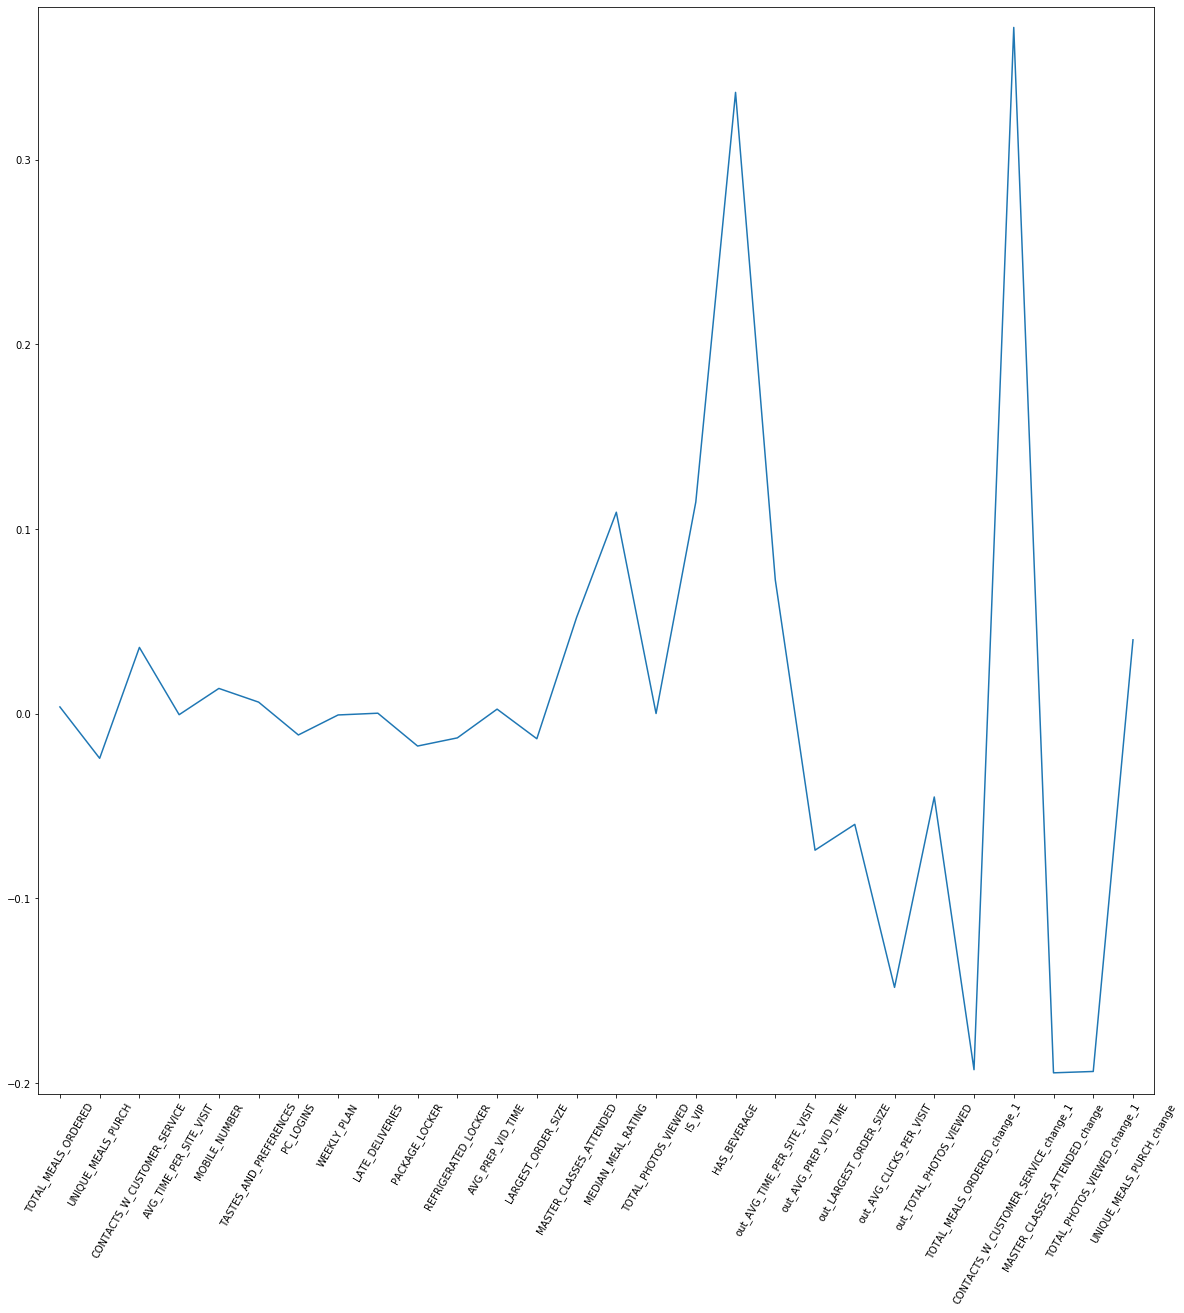

In [366]:
from sklearn.model_selection import GridSearchCV

lasso = sklearn.linear_model.Ridge()

lasso_cv = lasso

# Fit it to the data
lasso_fit = lasso_cv.fit(X_train, y_train)
lasso_coef = lasso_fit.coef_

print(f"Train score: {lasso_cv.score(X_train, y_train)}")
print(f"Test score: {lasso_cv.score(X_test, y_test)}")

# Plot the coefficients
fig, ax = plt.subplots(figsize=(20,20))
plt.plot(range(len(x_variables_rnd2)), lasso_coef)
plt.xticks(range(len(x_variables_rnd2)), x_variables_rnd2, rotation=60)
plt.margins(0.02)
plt.show()

pd.DataFrame(list(zip(x_variables_rnd2, lasso_coef))).to_excel("Lasso_Coef.xlsx")

<h2>KNeighbors</h2>

In [164]:
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.model_selection import GridSearchCV


# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with housing_data
scaler.fit(X_train)

#Train
# TRANSFORMING our data after fit
X_scaled = scaler.transform(X_train)


# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)

#Test
# TRANSFORMING our data after fit
X_scaled_test = scaler.transform(X_test)


# converting scaled data into a DataFrame
X_scaled_test_df = pd.DataFrame(X_scaled_test)

#X_scaled_df = X_train
#X_scaled_test_df = X_test

#--------------------------------------------


knn = KNeighborsRegressor(n_neighbors = 13,
                          algorithm="auto")
knn.fit(X_scaled_df, y_train)
knn.predict(X_scaled_test_df)
print(knn.score(X_scaled_df, y_train))
print(knn.score(X_scaled_test_df, y_test))


#--------------------------------------------


# Setup the hyperparameter grid
param_grid = {'n_neighbors': list(range(1,20)),
             'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
             }

# Instantiate the GridSearchCV object: knn_cv
knn_cv = GridSearchCV(knn, param_grid, cv=5)

# Fit it to the data
knn_cv.fit(X_scaled_df, y_train)

# Print the tuned parameters and score
print("Tuned KNN Regression Parameters: {}".format(knn_cv.best_params_)) 
print("Best score is {}".format(knn_cv.best_score_))

0.7643927134373574
0.7041235762456872
Tuned KNN Regression Parameters: {'algorithm': 'auto', 'n_neighbors': 8}
Best score is 0.7138239120748189


# Appendix

In [ ]:
#Average price paid per meal
columns        = []

new_column     = "AVG_REV_PER_MEAL"
df[new_column] = df["REVENUE"] / (df["TOTAL_MEALS_ORDERED"] + df["CANCELLATIONS_BEFORE_NOON"] + df["CANCELLATIONS_AFTER_NOON"])
columns.append(new_column)

In [ ]:
def define_pareto_variables():
    row_num       = []

    accum_rev     = 0
    accum_rev_lst = []

    accum_per     = 0
    accum_per_lst = []

    total_rev     = df["REVENUE"].sum()

    sorted_df = df.sort_values(by="REVENUE", ascending=False)

    for i, x in sorted_df.iterrows():
        row_num.append(i)

        accum_rev = accum_rev + x["REVENUE"]
        accum_rev_lst.append(accum_rev)

        accum_per = accum_rev / total_rev
        accum_per_lst.append(accum_per)

    pareto_data = {
        "Accum_Revenue"   : accum_rev_lst,
        "Accum_Revenue_%": accum_per_lst
    }

    pareto_df = pd.DataFrame(data = pareto_data, index = row_num)
    sorted_df = df.join(pareto_df).sort_values(by="REVENUE", ascending=False)

    return sorted_df

def show_pareto():
    fig, ax = plt.subplots(figsize=(10,10))
    ax.bar(x = sorted_df.index, height = sorted_df["REVENUE"], fill="blue")
    ax2 = ax.twinx()

    ax2.plot(sorted_df.index, sorted_df["Accum_Revenue_%"], color="C1")
    #ax2.yaxis.set_major_formatter(PercentFormatter())

    ax.tick_params(axis="y", colors="blue")
    ax2.tick_params(axis="y", colors="C1")
    plt.show()

TOTAL_MEALS_ORDERED


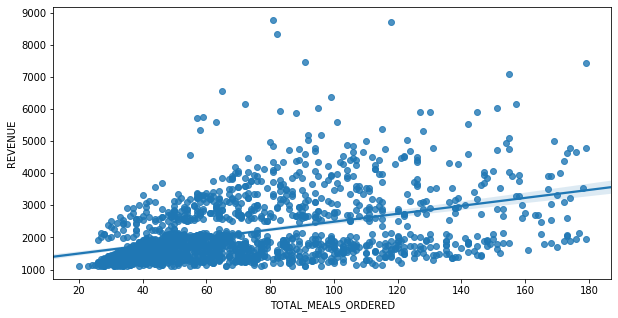

,REVENUE,TOTAL_MEALS_ORDERED
REVENUE,1.000000,0.419099
TOTAL_MEALS_ORDERED,0.419099,1.000000


In [62]:
#df["MEALS_PER_MONTH"] = df["TOTAL_MEALS_ORDERED"]/12
#df["REVENUE_PER_MONTH"] = df["REVENUE"]/12
#df["PRICE_PER_MEAL"] = df["REVENUE"]/df["TOTAL_MEALS_ORDERED"]
#df["inv_PRICE_PER_MEAL"] = 1/df["PRICE_PER_MEAL"]
#df["exp_VARIABLE"] = np.log(df["TOTAL_MEALS_ORDERED"])

#df = df.drop(["exp_PRICE_PER_MEAL", "REVENUE_PER_MONTH", "PRICE_PER_MEAL", "inv_PRICE_PER_MEAL"], axis = 1)

#sub_df   = df
variable = "TOTAL_MEALS_ORDERED"
sub_df   = df[np.logical_and(df[variable] >= 20,
                             df[variable] < 180)]

print(variable)
fig, ax = plt.subplots(figsize = (10,5))
sns.regplot(
    x = variable,
    y = "REVENUE",
    data = sub_df
)
plt.show()

sub_df[["REVENUE", variable]].corr()


#MEDIAN_MEAL_RATING [0 - 5> : 0.618873
#MEDIAN_MEAL_RATING [5 - 10>:

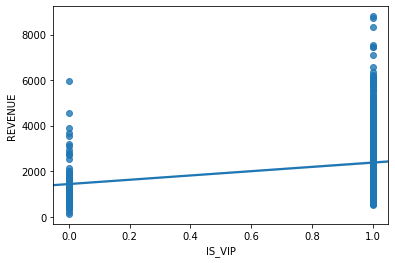

In [87]:
sns.regplot(x="IS_VIP", y="REVENUE", data = df)
plt.show()